In [15]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

Read Dataset

In [16]:
df = pd.read_excel("Dataset/Dataset.xlsx")[["urutan", "kelas"]]
df = df[['urutan', 'kelas']]
df

,urutan,kelas
0,AGTTGTTAGTCTACGTGGACCGACAAAGACAGATTCTTTGAGGGAG...,0
1,AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAG...,0
2,GTGGACCGCAAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAG...,0
3,TTTCATTTTACCACACGTAACGGAGAACCACACATGATCGTCGGTA...,0
4,ATGAATAACCAACGAAAAAATGCGAGAAAAACGCCTTTCAATATGC...,0
...,...,...
3453,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
3454,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
3455,ACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGCTGAAACG...,1
3456,ACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGCTGAAACG...,1


kelas
0    2046
1    1412
Name: count, dtype: int64


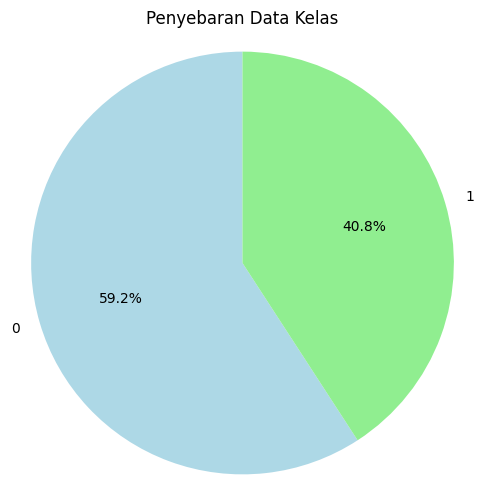

In [17]:
# Menghitung jumlah data untuk masing-masing kelas
class_counts = df['kelas'].value_counts()
print(class_counts)

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title("Penyebaran Data Kelas")
plt.axis('equal')
plt.show()

Menghilangkan Data Diluar ACGT

In [18]:
df = df[df['urutan'].str.contains('^[ACGT]+$', regex=True)]

In [19]:
df

,urutan,kelas
0,AGTTGTTAGTCTACGTGGACCGACAAAGACAGATTCTTTGAGGGAG...,0
1,AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAG...,0
2,GTGGACCGCAAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAG...,0
3,TTTCATTTTACCACACGTAACGGAGAACCACACATGATCGTCGGTA...,0
4,ATGAATAACCAACGAAAAAATGCGAGAAAAACGCCTTTCAATATGC...,0
...,...,...
3453,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
3454,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
3455,ACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGCTGAAACG...,1
3456,ACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGCTGAAACG...,1


kelas
0    1954
1    1372
Name: count, dtype: int64


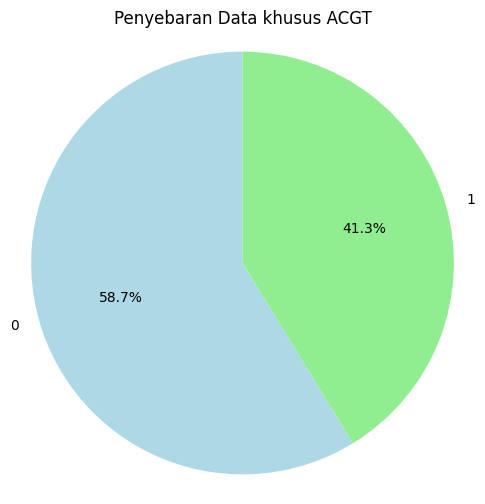

In [20]:
# Menghitung jumlah data untuk masing-masing kelas
class_counts = df['kelas'].value_counts()
print(class_counts)

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title("Penyebaran Data khusus ACGT")
plt.axis('equal')
plt.show()

Menghapus Data Duplikat

In [21]:
df = df.drop_duplicates(subset='urutan')

kelas
0    1333
1     628
Name: count, dtype: int64


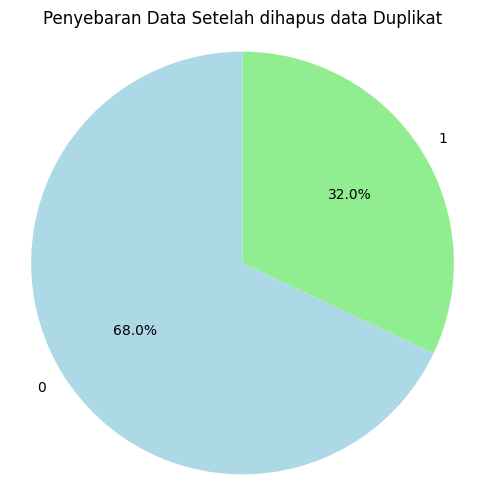

In [22]:
# Menghitung jumlah data untuk masing-masing kelas
class_counts = df['kelas'].value_counts()
print(class_counts)

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title("Penyebaran Data Setelah dihapus data Duplikat")
plt.axis('equal')
plt.show()

Fungsi - Fungsi

In [23]:
# Fungsi untuk menghasilkan K-mers dengan panjang 3 dari urutan DNA
def get_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

# Fungsi untuk membuat mapping manual dari K-mers ke angka
def create_kmer_mapping(kmers_list):
    unique_kmers = set([kmer for kmers in kmers_list for kmer in kmers])
    kmer_to_index = {kmer: idx + 1 for idx, kmer in enumerate(unique_kmers)}
    return kmer_to_index

# Fungsi untuk mengonversi K-mers ke angka berdasarkan mapping
def map_kmers_to_indices(kmers, kmer_mapping):
    return [kmer_mapping[kmer] for kmer in kmers]

def find_length_before_zeros(encoded_kmers):
    try:
        # Cari indeks pertama dari elemen 0
        zero_index = encoded_kmers.index(0)  # Menemukan indeks pertama di mana angka 0 muncul
    except ValueError:
        # Jika 0 tidak ditemukan, kembalikan panjang seluruh array
        zero_index = len(encoded_kmers)
    return zero_index


KMers / TimeStep

In [24]:
df['kmers'] = df['urutan'].apply(lambda x: get_kmers(x, 3))


kmer_mapping = create_kmer_mapping(df['kmers'])
print(f"Mapping dari K-mers ke angka: {kmer_mapping}")


df['encoded_kmers'] = df['kmers'].apply(lambda x: map_kmers_to_indices(x, kmer_mapping))


X = pad_sequences(df['encoded_kmers'].tolist(), padding='post')


y = df['kelas'].values


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

C:\Users\galih\AppData\Local\Temp\ipykernel_18660\849049487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmers'] = df['urutan'].apply(lambda x: get_kmers(x, 3))


Mapping dari K-mers ke angka: {'CAC': 1, 'CGT': 2, 'AAA': 3, 'TTT': 4, 'GAG': 5, 'GAA': 6, 'AAT': 7, 'GGC': 8, 'TGT': 9, 'TTC': 10, 'GCG': 11, 'CAA': 12, 'CCG': 13, 'AAG': 14, 'CAT': 15, 'AGG': 16, 'GCT': 17, 'ATA': 18, 'TAT': 19, 'GTC': 20, 'TGC': 21, 'ACG': 22, 'ACC': 23, 'CTG': 24, 'GCA': 25, 'CCA': 26, 'TGG': 27, 'GGT': 28, 'GCC': 29, 'TAC': 30, 'CGA': 31, 'TCT': 32, 'TCG': 33, 'GAT': 34, 'ACT': 35, 'TCC': 36, 'AGC': 37, 'CGG': 38, 'TAG': 39, 'TGA': 40, 'GGA': 41, 'CTC': 42, 'ATG': 43, 'ATC': 44, 'AGA': 45, 'CTA': 46, 'GTT': 47, 'ACA': 48, 'TTA': 49, 'TCA': 50, 'ATT': 51, 'CCC': 52, 'AGT': 53, 'GTA': 54, 'CGC': 55, 'CTT': 56, 'CAG': 57, 'AAC': 58, 'CCT': 59, 'GTG': 60, 'TAA': 61, 'TTG': 62, 'GAC': 63, 'GGG': 64}


C:\Users\galih\AppData\Local\Temp\ipykernel_18660\849049487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_kmers'] = df['kmers'].apply(lambda x: map_kmers_to_indices(x, kmer_mapping))


Shape of X: (1961, 12119)
Shape of y: (1961,)


Cek Sequence Terpendek di Kelas Minor / 1

In [25]:
min_length = float('inf')  # Awal panjang terpendek yang sangat besar
min_index = -1  # Menyimpan indeks data terpendek

# Filter hanya data dengan kolom 'kelas' bernilai 1
df_kelas_1 = df[df['kelas'] == 1]

# Iterasi melalui dataset yang sudah difilter
for i, row in df_kelas_1.iterrows():
    encoded_kmers = row['encoded_kmers']
    length_before_zeros = find_length_before_zeros(list(encoded_kmers))  # Ubah ke list jika perlu
    print(f"Data ke-{i+1}: Panjang sebelum 0 muncul = {length_before_zeros}")
    
    # Update jika panjang yang ditemukan lebih kecil dari yang sebelumnya
    if length_before_zeros < min_length:
        min_length = length_before_zeros
        min_index = i

# Cetak data terpendek di antara yang memiliki 'kelas' bernilai 1
print(f"Data dengan panjang terpendek sebelum 0 muncul di kelas 1 adalah data ke-{min_index+1} dengan panjang {min_length}.")


Data ke-2049: Panjang sebelum 0 muncul = 10676
Data ke-2051: Panjang sebelum 0 muncul = 10664
Data ke-2052: Panjang sebelum 0 muncul = 10666
Data ke-2053: Panjang sebelum 0 muncul = 10676
Data ke-2054: Panjang sebelum 0 muncul = 10675
Data ke-2055: Panjang sebelum 0 muncul = 10676
Data ke-2056: Panjang sebelum 0 muncul = 10676
Data ke-2057: Panjang sebelum 0 muncul = 10660
Data ke-2058: Panjang sebelum 0 muncul = 10676
Data ke-2059: Panjang sebelum 0 muncul = 10676
Data ke-2060: Panjang sebelum 0 muncul = 10676
Data ke-2061: Panjang sebelum 0 muncul = 10676
Data ke-2062: Panjang sebelum 0 muncul = 10676
Data ke-2063: Panjang sebelum 0 muncul = 10658
Data ke-2064: Panjang sebelum 0 muncul = 10676
Data ke-2065: Panjang sebelum 0 muncul = 10676
Data ke-2066: Panjang sebelum 0 muncul = 10676
Data ke-2067: Panjang sebelum 0 muncul = 10678
Data ke-2068: Panjang sebelum 0 muncul = 2320
Data ke-2069: Panjang sebelum 0 muncul = 2320
Data ke-2070: Panjang sebelum 0 muncul = 2320
Data ke-2071: Pa

Memilih mayor (Downsampling)

In [26]:
seq_terpendek = 145
# Filter hanya data dengan kolom 'kelas' bernilai 0
df_kelas_0 = df[df['kelas'] == 0]

# Ambil data dengan panjang sebelum 0 muncul yang lebih dari 496
filtered_kelas_0 = []

# Iterasi melalui dataset yang sudah difilter
for i, row in df_kelas_0.iterrows():
    encoded_kmers = row['encoded_kmers']
    length_before_zeros = find_length_before_zeros(list(encoded_kmers))  # Ubah ke list jika perlu
    
    # Hanya ambil data dengan panjang sequen saja
    if length_before_zeros > seq_terpendek:
        filtered_kelas_0.append(row)

df_filtered_kelas_0 = pd.DataFrame(filtered_kelas_0)

df_kelas_1 = df[df['kelas'] == 1]

# Gabungkan data dari kelas 0 dan kelas 1
df_combined = pd.concat([df_filtered_kelas_0, df_kelas_1])

# Tampilkan hasil gabungan
df_combined


,urutan,kelas,kmers,encoded_kmers
0,AGTTGTTAGTCTACGTGGACCGACAAAGACAGATTCTTTGAGGGAG...,0,"[AGT, GTT, TTG, TGT, GTT, TTA, TAG, AGT, GTC, ...","[53, 47, 62, 9, 47, 49, 39, 53, 20, 32, 46, 30..."
1,AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAG...,0,"[AGT, GTT, TTG, TGT, GTT, TTA, TAG, AGT, GTC, ...","[53, 47, 62, 9, 47, 49, 39, 53, 20, 32, 46, 30..."
2,GTGGACCGCAAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAG...,0,"[GTG, TGG, GGA, GAC, ACC, CCG, CGC, GCA, CAA, ...","[60, 27, 41, 63, 23, 13, 55, 25, 12, 3, 14, 45..."
3,TTTCATTTTACCACACGTAACGGAGAACCACACATGATCGTCGGTA...,0,"[TTT, TTC, TCA, CAT, ATT, TTT, TTT, TTA, TAC, ...","[4, 10, 50, 15, 51, 4, 4, 49, 30, 23, 26, 1, 4..."
4,ATGAATAACCAACGAAAAAATGCGAGAAAAACGCCTTTCAATATGC...,0,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[43, 40, 6, 7, 18, 61, 58, 23, 26, 12, 58, 22,..."
...,...,...,...,...
3353,ATGAATAACCAACGGAAAAAGGCGAAAAACACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[43, 40, 6, 7, 18, 61, 58, 23, 26, 12, 58, 22,..."
3361,ATGAATAACCAACGGAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[43, 40, 6, 7, 18, 61, 58, 23, 26, 12, 58, 22,..."
3452,ATGAACAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAC, ACA, CAA, AAC, ACC, CCA, ...","[43, 40, 6, 58, 48, 12, 58, 23, 26, 12, 58, 22..."
3453,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[43, 40, 6, 7, 18, 61, 58, 23, 26, 12, 58, 22,..."


kelas
0    1305
1     628
Name: count, dtype: int64


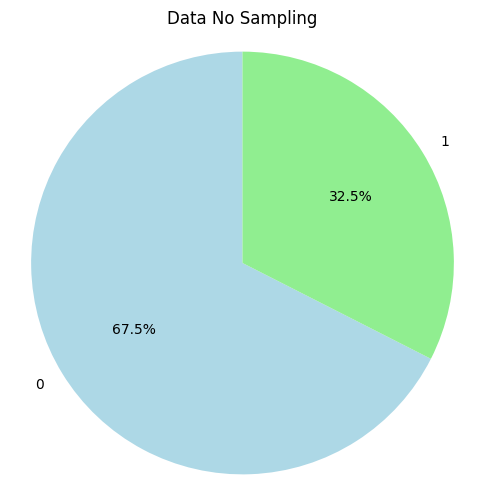

In [29]:
# Menghitung jumlah data untuk masing-masing kelas
class_counts = df_combined['kelas'].value_counts()
print(class_counts)

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title("Data No Sampling")
plt.axis('equal')
plt.show()

In [30]:
df_process = df_combined[["urutan", "kelas"]]
df_process

,urutan,kelas
0,AGTTGTTAGTCTACGTGGACCGACAAAGACAGATTCTTTGAGGGAG...,0
1,AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAG...,0
2,GTGGACCGCAAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAG...,0
3,TTTCATTTTACCACACGTAACGGAGAACCACACATGATCGTCGGTA...,0
4,ATGAATAACCAACGAAAAAATGCGAGAAAAACGCCTTTCAATATGC...,0
...,...,...
3353,ATGAATAACCAACGGAAAAAGGCGAAAAACACGCCTTTCAATATGC...,1
3361,ATGAATAACCAACGGAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
3452,ATGAACAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
3453,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1


In [31]:
# df_process.to_excel("Dataset/Dataset_Preprocess_No-Sampling.xlsx", index=False)